# Reinforcement Learning (RL) Environments


In this notebook, we define the backbone code for RL environments, following [OpenAI Gym](https://gym.openai.com/). 

Then, we create some example environments that we shall use in subsequent coding sessions throught the course: we will create three gridworld environments: GridWorld, GridWorld2, and Windy GridWorld. We also create a Qubit environment, and discuss some OpenAI Gym environments. 

In [1]:
import numpy as np
from scipy.linalg import expm

In [2]:
class MyEnv():
    """
    Gym style environment for RL. You may also inherit the class structure from OpenAI Gym. 
    Parameters:
        n_time_steps:   int
                        Total number of time steps within each episode
        seed:   int
                seed of the RNG (for reproducibility)
    """
    
    def __init__(self, n_time_steps, seed):
        """
        Initialize the environment.
        
        """
        
        ### define action space variables
        
        ### define state space variables
        
        
        
        pass

    
    
    def step(self, action):
        """
        Interface between environment and agent. Performs one step in the environemnt.
        Parameters:
            action: int
                    the index of the respective action in the action array
        Returns:
            output: ( object, float, bool)
                    information provided by the environment about its current state:
                    (state, reward, done)
        """

        pass

        return self.state, reward, done

    
    
    def set_seed(self,seed=0):
        """
        Sets the seed of the RNG.
        
        """
        pass
    
    
    
    def reset(self):
        """
        Resets the environment to its initial values.
        Returns:
            state:  object
                    the initial state of the environment
        """
        pass

        return self.state

    
    
    def render(self):
        """
        Plots the state of the environment. For visulization purposes only. 

        """
        pass
    
    
    # ... add extra private and public functions as necessary

## GridWorld

Consider the GridWorld problem Example 3.5 from Sutton & Barto's "Reinforcement Learning: an Introduction", (MIT Press, 2018):

A $5\times 5$ grid with open boundary conditions has two pairs of special states: $(A,A')$ and $(B,B')$, such that from state $A$ ($B$) the environment always goes into stte $A'$ ($B'$). The state transitions receive the rewards $r(s,s')$: 

1. $r(A\to A')=+10$
2. $r(B\to B')=+5$
3. $r(s',s)=0$ for all other states (except when a move from a boundary state $s$ tries to leave the grid, in which case $r=-1$).

From each state $s$, the RL agent can take four possible actions $a$: $north$, $south$, $east$, and $west$.

The **action space** is discrete four-element set $\mathcal{A}=(north, south, east, west)$

The **state space** is the two-dimensional grid $\mathcal{S}=\mathbb{Z}_5^2$: each state $s=(m,n)$ is labeled by two integers $m,n\in\{0,1,2,3,4\}$. The special states have the coordinates $A=(1,4)$, $A'=(1,0)$, $B=(3,4)$, and $B'=(3,2)$.

Finally, the **reward space** is given by the discrete set $\mathcal{R}=\{-1,0,5,10\}$.


In [3]:
class GridWorldEnv():
    """
    Gym style environment for GridWorld
    Parameters:
        n_time_steps:   int
                        Total number of time steps within each episode
        seed:   int
                seed of the RNG (for reproducibility)
    """
    
    def __init__(self, n_time_steps=10, seed=0):
        """
        Initialize the environment.
        
        """
        
        self.n_time_steps = n_time_steps
        
        ### define action space variables
        self.actions=np.array([0,1,2,3])
        #['north', 'south', 'east', 'west'] in coordinate form
        self.action_space = [np.array([0,1]), np.array([0,-1]), np.array([1,0]), np.array([-1,0])] 
        
        ### define state space variables
        self.state_A  = np.array([1,4])
        self.state_Ap = np.array([1,0])
        self.state_B  = np.array([3,4])
        self.state_Bp = np.array([3,2])
                    
        # set seed
        self.set_seed(seed)
        self.reset()

    
    
    def step(self, action):
        """
        Interface between environment and agent. Performs one step in the environemnt.
        Parameters:
            action: int
                    the index of the respective action in the action array
        Returns:
            output: ( np.array, float, bool)
                    information provided by the environment about its current state:
                    (state, reward, done)
        """
        
        # check if action tries to take state across the grid boundary 
        bdry_bool=    (self.state[0]==0 and action==3) or (self.state[0]==4 and action==2) \
                   or (self.state[1]==0 and action==1) or (self.state[1]==4 and action==0)
        
           
        # environment dynamics (deterministic)
        if np.linalg.norm(self.state - self.state_A) < 1E-14:
            self.state=self.state_Ap.copy()
            reward=10
        elif np.linalg.norm(self.state - self.state_B) < 1E-14:
            self.state=self.state_Bp.copy()
            reward=5
        elif bdry_bool:
            reward=-1
        else:
            self.state+=self.action_space[action]
            reward=0
        
        done=False # infinite-horizon task
        
        self.current_step += 1
        
        return self.state, reward, done

    
    
    def set_seed(self,seed=0):
        """
        Sets the seed of the RNG.
        
        """
        np.random.seed(seed)
        
    
    
    def reset(self):
        """
        Resets the environment to its initial values.
        Returns:
            state:  np.array
                    the initial state of the environment
        """
        self.current_step = 0
        
        self.state = np.array([2,2]) #initialize to some state on the grid
        return self.state
    
    
    
    def sample(self):
        """
        Returns a randomly sampled action.
        """
        return np.random.choice(self.actions) # equiprobable policy

Let us now test the GridWorld environment. We do so by fixing the number of time steps, `n_time_steps`, and the `seed`. We then create the environment and reset it. Finally, we want to loop over the 

In [4]:
n_time_steps=20
seed=0

env=GridWorldEnv(n_time_steps=n_time_steps,seed=seed)
env.reset()

for _ in range(n_time_steps):
    
    # pick a random action
    action=env.sample() # equiprobable policy
    
    # take an environment step
    state=env.state.copy()
    state_p, reward, done = env.step(action)
    
    print("{}. s={}, a={}, r={}, s'={}".format(_, state, env.action_space[action], reward, state_p))
    

0. s=[2 2], a=[0 1], r=0, s'=[2 3]
1. s=[2 3], a=[-1  0], r=0, s'=[1 3]
2. s=[1 3], a=[ 0 -1], r=0, s'=[1 2]
3. s=[1 2], a=[0 1], r=0, s'=[1 3]
4. s=[1 3], a=[-1  0], r=0, s'=[0 3]
5. s=[0 3], a=[-1  0], r=-1, s'=[0 3]
6. s=[0 3], a=[-1  0], r=-1, s'=[0 3]
7. s=[0 3], a=[-1  0], r=-1, s'=[0 3]
8. s=[0 3], a=[ 0 -1], r=0, s'=[0 2]
9. s=[0 2], a=[-1  0], r=-1, s'=[0 2]
10. s=[0 2], a=[ 0 -1], r=0, s'=[0 1]
11. s=[0 1], a=[1 0], r=0, s'=[1 1]
12. s=[1 1], a=[0 1], r=0, s'=[1 2]
13. s=[1 2], a=[-1  0], r=0, s'=[0 2]
14. s=[0 2], a=[1 0], r=0, s'=[1 2]
15. s=[1 2], a=[0 1], r=0, s'=[1 3]
16. s=[1 3], a=[0 1], r=0, s'=[1 4]
17. s=[1 4], a=[0 1], r=10, s'=[1 0]
18. s=[1 0], a=[1 0], r=0, s'=[2 0]
19. s=[2 0], a=[ 0 -1], r=-1, s'=[2 0]


## GridWorld 2

This is a finite-horizon, i.e. episodic, GridWorld environment. We consider the $4\times 4$ grid from Example 4.1 in Sutton & Barto. 

**state space:** $\mathcal{S} = \{0,1,2,\dots,15\}$, where $0=s=15$ is the terminal state. 

**action space:** $\mathcal{A} = \{north,south, east,west\}$. Actions trying to take the agent off the grid leave the state unchanged: to implement this behavior, we will define smaller actions spaces $\mathcal{A}(s_\mathrm{boundary})$ for all states $s_\mathrm{boundary}$ at the bounary of the grid.

**reward space:** $\mathcal{R}=\{-1\}$; $r(s,s',a)=-1$ for all states $s,s'\in\mathcal{S}$ and all allowed actions $a\in\mathcal{A}(s)$. 


In [5]:
class Episodic_GridWorldEnv():
    """
    Gym style environment for GridWorld
    Parameters:
        n_time_steps:   int
                        Total number of time steps within each episode
        seed:   int
                seed of the RNG (for reproducibility)
    """
    
    def __init__(self, n_time_steps=10, seed=0):
        """
        Initialize the environment.
        
        """
        
        self.n_time_steps = n_time_steps
        
        ### define action space variables
        #['north', 'south', 'east', 'west']
        self.action_space = [np.array([0,1]), np.array([0,-1]), np.array([1,0]), np.array([-1,0])]
        # define the allowed actions from every state s, taking into account the boundary
        self.actions={}
        for m in range(4):
            for n in range(4):
                
                if m==0: 
                    if n==0:
                        self.actions[m,n]=np.array([0,2])
                    elif n==3:
                        self.actions[m,n]=np.array([1,2])
                    else:
                        self.actions[m,n]=np.array([0,1,2])
                         
                elif m==3:
                    if n==0:
                        self.actions[m,n]=np.array([0,3])
                    elif n==3:
                        self.actions[m,n]=np.array([1,3])
                    else:
                        self.actions[m,n]=np.array([0,1,3])
                
                elif 0<m<3:
                    if n==0:
                        self.actions[m,n]=np.array([0,2,3])
                    elif n==3:
                        self.actions[m,n]=np.array([1,2,3])
                    else:
                        self.actions[m,n]=np.array([0,1,2,3])
                
        
        ### define state space variables
        # the two terminal states
        self.state_T1  = np.array([0,0])
        self.state_T2  = np.array([3,3])
                    
        # set seed
        self.set_seed(seed)
        self.reset()

    
    
    def step(self, action):
        """
        Interface between environment and agent. Performs one step in the environemnt.
        Parameters:
            action: int
                    the index of the respective action in the action array
        Returns:
            output: ( np.array, float, bool)
                    information provided by the environment about its current state:
                    (state, reward, done)
        """
        
        # check if action tries to take state across the grid boundary 
        bdry_bool=    (self.state[0]==0 and action==3) or (self.state[0]==3 and action==2) \
                   or (self.state[1]==0 and action==1) or (self.state[1]==3 and action==0)
        
           
        # environment dynamics (deterministic)
        
        reward=-1 # all trasitions have reward -1
        
        # if state is not at the boundary, update the state
        if not bdry_bool:
            self.state+=self.action_space[action]
        
        done=False
        if np.linalg.norm(self.state - self.state_T1) < 1E-14 or np.linalg.norm(self.state - self.state_T2) < 1E-14:
            done=True
        
        self.current_step += 1
        
        return self.state, reward, done

    
    
    def set_seed(self,seed=0):
        """
        Sets the seed of the RNG.
        
        """
        np.random.seed(seed)
        
    
    
    def reset(self, random=False):
        """
        Resets the environment to its initial values.
        Returns:
            state:  np.array
                    the initial state of the environment
            random: bool
                    controls whether the initial state is a random state on the grid or a fixed initials state.
        """
        
        self.current_step = 0
        
        if random:
            self.state = np.random.randint(4,size=(2)) 
            while np.linalg.norm(self.state - self.state_T1) < 1E-14 or np.linalg.norm(self.state - self.state_T2) < 1E-14:
                self.state = np.random.randint(4,size=(2)) 
        else:
            self.state = np.array([2,2]) #initialize to some state on the grid
        
        return self.state

Let us test the environment to make sure it is implemented properly. Note that we are fixing the seed, so if you want to see a different output, you should change the value of `seed`. 

In [6]:
env=Episodic_GridWorldEnv()

seed=4
env.set_seed(seed)

env.reset()


done=False
j=0
while not done:
    
    state=env.state.copy()
    
    #print(env.actions[state[0],state[1]])
    
    # pick a random action
    action=np.random.choice(env.actions[state[0],state[1]]) # equiprobable policy from state s
    
    # take an environment step
    state_p, reward, done = env.step(action)
    
    print("{0:2d}. s={1}, a={2:}, r={3:2d}, s'={4}".format(j, state, env.action_space[action], reward, state_p))
    
    j+=1
    
    if done:
        print('\nreached terminal state!')
        break

 0. s=[2 2], a=[1 0], r=-1, s'=[3 2]
 1. s=[3 2], a=[-1  0], r=-1, s'=[2 2]
 2. s=[2 2], a=[-1  0], r=-1, s'=[1 2]
 3. s=[1 2], a=[ 0 -1], r=-1, s'=[1 1]
 4. s=[1 1], a=[ 0 -1], r=-1, s'=[1 0]
 5. s=[1 0], a=[0 1], r=-1, s'=[1 1]
 6. s=[1 1], a=[-1  0], r=-1, s'=[0 1]
 7. s=[0 1], a=[0 1], r=-1, s'=[0 2]
 8. s=[0 2], a=[1 0], r=-1, s'=[1 2]
 9. s=[1 2], a=[ 0 -1], r=-1, s'=[1 1]
10. s=[1 1], a=[1 0], r=-1, s'=[2 1]
11. s=[2 1], a=[0 1], r=-1, s'=[2 2]
12. s=[2 2], a=[-1  0], r=-1, s'=[1 2]
13. s=[1 2], a=[ 0 -1], r=-1, s'=[1 1]
14. s=[1 1], a=[1 0], r=-1, s'=[2 1]
15. s=[2 1], a=[-1  0], r=-1, s'=[1 1]
16. s=[1 1], a=[-1  0], r=-1, s'=[0 1]
17. s=[0 1], a=[ 0 -1], r=-1, s'=[0 0]

reached terminal state!


## Windy GridWorld

This is a finite-horizon, i.e. episodic, GridWorld environment. We consider the $10\times 7$ grid from Example 6.5 in Sutton & Barto. 

**state space:** $\mathcal{S} = \{(m,n)|m=0,\dots,9, n=0,\dots,6\}$, where the terminal state is $G=(7,3)$. 

**action space:** $\mathcal{A} = \{north,south, east,west\}$; actions trying to take the agent off the grid leave the state unchanged.

**reward space:** $\mathcal{R}=\{-1\}$; $r(s,s',a)=-1$ for all states $s,s'\in\mathcal{S}$ and allowed actions $a\in\mathcal{A}(s)$. 

In [7]:
class WindyGridWorldEnv():
    """
    Gym style environment for GridWorld
    Parameters:
        n_time_steps:   int
                        Total number of time steps within each episode
        seed:   int
                seed of the RNG (for reproducibility)
    """
    
    def __init__(self, n_time_steps=10, seed=0):
        """
        Initialize the environment.
        
        """
        
        self.n_time_steps = n_time_steps
        
        ### define action space variables
        #['north', 'south', 'east', 'west']
        self.action_space = [np.array([0,1]), np.array([0,-1]), np.array([1,0]), np.array([-1,0])] 
        
        # wind shift
        self.wind = np.array([0,0,0,1,1,1,2,2,1,0])
        
        ### define state space variables
        # the initial and terminal states
        self.state_S  = np.array([0,3]) # initial state
        self.state_G  = np.array([7,3]) # terminal state
                    
        # set seed
        self.set_seed(seed)
        self.reset()

    
    
    def step(self, action):
        """
        Interface between environment and agent. Performs one step in the environemnt.
        Parameters:
            action: int
                    the index of the respective action in the action array
        Returns:
            output: ( np.array, float, bool)
                    information provided by the environment about its current state:
                    (state, reward, done)
        """
        
        # check if action tries to take state across the grid boundary 
        bdry_bool=    (self.state[0]==0 and action==3) or (self.state[0]==9 and action==2) \
                   or (self.state[1]==0 and action==1) or (self.state[1]==6 and action==0)
        
        # environment dynamics (deterministic)
        reward=-1 # all trasitions have reward -1
        
        if not bdry_bool:
            # check if wind pushes state outside the boundary
            if self.state[1]+self.wind[self.state[0]]+self.action_space[action][1]<=6:
                self.state[1]+=self.wind[self.state[0]]
            self.state+=self.action_space[action]
            
            
        # check if state is terminal
        done=False
        if np.linalg.norm(self.state - self.state_G) < 1E-14:
            done=True
        
        self.current_step += 1
        
        return self.state, reward, done

    
    
    def set_seed(self,seed=0):
        """
        Sets the seed of the RNG.
        
        """
        np.random.seed(seed)
        
    
    
    def reset(self, random=False):
        """
        Resets the environment to its initial values.
        Returns:
            state:  np.array
                    the initial state of the environment
            random: bool
                    controls whether the initial state is a random state on the grid or a fixed initials state.
        """
        
        self.current_step = 0
        
        self.state = self.state_S.copy() #initialize to S
        
        return self.state

Let us test the Windy GridWorld

In [8]:
env=WindyGridWorldEnv()
env.reset()

done=False
j=0
while not done:
    
    # pick a random action
    action=np.random.choice([0,1,2,3]) # equiprobable policy
    
    # take an environment step
    state=env.state.copy()
    state_p, reward, done = env.step(action)
    
    print("{}. s={}, a={}, r={}, s'={}".format(j, state, env.action_space[action], reward, state_p))
    
    j+=1
    
    if done:
        print('\nreached terminal state!')
        break

0. s=[0 3], a=[0 1], r=-1, s'=[0 4]
1. s=[0 4], a=[-1  0], r=-1, s'=[0 4]
2. s=[0 4], a=[ 0 -1], r=-1, s'=[0 3]
3. s=[0 3], a=[0 1], r=-1, s'=[0 4]
4. s=[0 4], a=[-1  0], r=-1, s'=[0 4]
5. s=[0 4], a=[-1  0], r=-1, s'=[0 4]
6. s=[0 4], a=[-1  0], r=-1, s'=[0 4]
7. s=[0 4], a=[-1  0], r=-1, s'=[0 4]
8. s=[0 4], a=[ 0 -1], r=-1, s'=[0 3]
9. s=[0 3], a=[-1  0], r=-1, s'=[0 3]
10. s=[0 3], a=[ 0 -1], r=-1, s'=[0 2]
11. s=[0 2], a=[1 0], r=-1, s'=[1 2]
12. s=[1 2], a=[0 1], r=-1, s'=[1 3]
13. s=[1 3], a=[-1  0], r=-1, s'=[0 3]
14. s=[0 3], a=[1 0], r=-1, s'=[1 3]
15. s=[1 3], a=[0 1], r=-1, s'=[1 4]
16. s=[1 4], a=[0 1], r=-1, s'=[1 5]
17. s=[1 5], a=[0 1], r=-1, s'=[1 6]
18. s=[1 6], a=[1 0], r=-1, s'=[2 6]
19. s=[2 6], a=[ 0 -1], r=-1, s'=[2 5]
20. s=[2 5], a=[1 0], r=-1, s'=[3 5]
21. s=[3 5], a=[-1  0], r=-1, s'=[2 6]
22. s=[2 6], a=[-1  0], r=-1, s'=[1 6]
23. s=[1 6], a=[1 0], r=-1, s'=[2 6]
24. s=[2 6], a=[0 1], r=-1, s'=[2 6]
25. s=[2 6], a=[ 0 -1], r=-1, s'=[2 5]
26. s=[2 5], a=[ 0 -

687. s=[1 6], a=[ 0 -1], r=-1, s'=[1 5]
688. s=[1 5], a=[1 0], r=-1, s'=[2 5]
689. s=[2 5], a=[-1  0], r=-1, s'=[1 5]
690. s=[1 5], a=[1 0], r=-1, s'=[2 5]
691. s=[2 5], a=[-1  0], r=-1, s'=[1 5]
692. s=[1 5], a=[-1  0], r=-1, s'=[0 5]
693. s=[0 5], a=[0 1], r=-1, s'=[0 6]
694. s=[0 6], a=[-1  0], r=-1, s'=[0 6]
695. s=[0 6], a=[1 0], r=-1, s'=[1 6]
696. s=[1 6], a=[1 0], r=-1, s'=[2 6]
697. s=[2 6], a=[0 1], r=-1, s'=[2 6]
698. s=[2 6], a=[-1  0], r=-1, s'=[1 6]
699. s=[1 6], a=[1 0], r=-1, s'=[2 6]
700. s=[2 6], a=[ 0 -1], r=-1, s'=[2 5]
701. s=[2 5], a=[0 1], r=-1, s'=[2 6]
702. s=[2 6], a=[-1  0], r=-1, s'=[1 6]
703. s=[1 6], a=[ 0 -1], r=-1, s'=[1 5]
704. s=[1 5], a=[1 0], r=-1, s'=[2 5]
705. s=[2 5], a=[ 0 -1], r=-1, s'=[2 4]
706. s=[2 4], a=[ 0 -1], r=-1, s'=[2 3]
707. s=[2 3], a=[0 1], r=-1, s'=[2 4]
708. s=[2 4], a=[ 0 -1], r=-1, s'=[2 3]
709. s=[2 3], a=[ 0 -1], r=-1, s'=[2 2]
710. s=[2 2], a=[-1  0], r=-1, s'=[1 2]
711. s=[1 2], a=[ 0 -1], r=-1, s'=[1 1]
712. s=[1 1], a=[-1 

906. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
907. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
908. s=[7 5], a=[ 0 -1], r=-1, s'=[7 6]
909. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
910. s=[7 5], a=[0 1], r=-1, s'=[7 6]
911. s=[7 6], a=[1 0], r=-1, s'=[8 6]
912. s=[8 6], a=[1 0], r=-1, s'=[9 6]
913. s=[9 6], a=[1 0], r=-1, s'=[9 6]
914. s=[9 6], a=[0 1], r=-1, s'=[9 6]
915. s=[9 6], a=[1 0], r=-1, s'=[9 6]
916. s=[9 6], a=[-1  0], r=-1, s'=[8 6]
917. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
918. s=[7 6], a=[0 1], r=-1, s'=[7 6]
919. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
920. s=[7 5], a=[1 0], r=-1, s'=[8 5]
921. s=[8 5], a=[1 0], r=-1, s'=[9 6]
922. s=[9 6], a=[-1  0], r=-1, s'=[8 6]
923. s=[8 6], a=[0 1], r=-1, s'=[8 6]
924. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
925. s=[8 6], a=[1 0], r=-1, s'=[9 6]
926. s=[9 6], a=[0 1], r=-1, s'=[9 6]
927. s=[9 6], a=[0 1], r=-1, s'=[9 6]
928. s=[9 6], a=[1 0], r=-1, s'=[9 6]
929. s=[9 6], a=[ 0 -1], r=-1, s'=[9 5]
930. s=[9 5], a=[1 0], r=-1, s'=[9 5]
931. s=[9 5], a=[0 1], r=-1, s

1405. s=[2 3], a=[1 0], r=-1, s'=[3 3]
1406. s=[3 3], a=[ 0 -1], r=-1, s'=[3 3]
1407. s=[3 3], a=[0 1], r=-1, s'=[3 5]
1408. s=[3 5], a=[-1  0], r=-1, s'=[2 6]
1409. s=[2 6], a=[ 0 -1], r=-1, s'=[2 5]
1410. s=[2 5], a=[-1  0], r=-1, s'=[1 5]
1411. s=[1 5], a=[ 0 -1], r=-1, s'=[1 4]
1412. s=[1 4], a=[1 0], r=-1, s'=[2 4]
1413. s=[2 4], a=[-1  0], r=-1, s'=[1 4]
1414. s=[1 4], a=[ 0 -1], r=-1, s'=[1 3]
1415. s=[1 3], a=[-1  0], r=-1, s'=[0 3]
1416. s=[0 3], a=[0 1], r=-1, s'=[0 4]
1417. s=[0 4], a=[0 1], r=-1, s'=[0 5]
1418. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
1419. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
1420. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
1421. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
1422. s=[0 5], a=[ 0 -1], r=-1, s'=[0 4]
1423. s=[0 4], a=[1 0], r=-1, s'=[1 4]
1424. s=[1 4], a=[ 0 -1], r=-1, s'=[1 3]
1425. s=[1 3], a=[0 1], r=-1, s'=[1 4]
1426. s=[1 4], a=[0 1], r=-1, s'=[1 5]
1427. s=[1 5], a=[ 0 -1], r=-1, s'=[1 4]
1428. s=[1 4], a=[0 1], r=-1, s'=[1 5]
1429. s=[1 5], a=[ 0 -1], r=-1, s'

1695. s=[3 6], a=[1 0], r=-1, s'=[4 6]
1696. s=[4 6], a=[ 0 -1], r=-1, s'=[4 6]
1697. s=[4 6], a=[0 1], r=-1, s'=[4 6]
1698. s=[4 6], a=[ 0 -1], r=-1, s'=[4 6]
1699. s=[4 6], a=[0 1], r=-1, s'=[4 6]
1700. s=[4 6], a=[1 0], r=-1, s'=[5 6]
1701. s=[5 6], a=[0 1], r=-1, s'=[5 6]
1702. s=[5 6], a=[-1  0], r=-1, s'=[4 6]
1703. s=[4 6], a=[0 1], r=-1, s'=[4 6]
1704. s=[4 6], a=[-1  0], r=-1, s'=[3 6]
1705. s=[3 6], a=[1 0], r=-1, s'=[4 6]
1706. s=[4 6], a=[0 1], r=-1, s'=[4 6]
1707. s=[4 6], a=[1 0], r=-1, s'=[5 6]
1708. s=[5 6], a=[1 0], r=-1, s'=[6 6]
1709. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
1710. s=[5 6], a=[1 0], r=-1, s'=[6 6]
1711. s=[6 6], a=[0 1], r=-1, s'=[6 6]
1712. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
1713. s=[5 6], a=[1 0], r=-1, s'=[6 6]
1714. s=[6 6], a=[ 0 -1], r=-1, s'=[6 5]
1715. s=[6 5], a=[-1  0], r=-1, s'=[5 5]
1716. s=[5 5], a=[0 1], r=-1, s'=[5 6]
1717. s=[5 6], a=[0 1], r=-1, s'=[5 6]
1718. s=[5 6], a=[ 0 -1], r=-1, s'=[5 6]
1719. s=[5 6], a=[-1  0], r=-1, s'=[4 6]
1720.

2209. s=[4 6], a=[0 1], r=-1, s'=[4 6]
2210. s=[4 6], a=[-1  0], r=-1, s'=[3 6]
2211. s=[3 6], a=[1 0], r=-1, s'=[4 6]
2212. s=[4 6], a=[1 0], r=-1, s'=[5 6]
2213. s=[5 6], a=[ 0 -1], r=-1, s'=[5 6]
2214. s=[5 6], a=[0 1], r=-1, s'=[5 6]
2215. s=[5 6], a=[1 0], r=-1, s'=[6 6]
2216. s=[6 6], a=[ 0 -1], r=-1, s'=[6 5]
2217. s=[6 5], a=[1 0], r=-1, s'=[7 5]
2218. s=[7 5], a=[ 0 -1], r=-1, s'=[7 6]
2219. s=[7 6], a=[1 0], r=-1, s'=[8 6]
2220. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
2221. s=[7 6], a=[1 0], r=-1, s'=[8 6]
2222. s=[8 6], a=[0 1], r=-1, s'=[8 6]
2223. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
2224. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
2225. s=[8 6], a=[1 0], r=-1, s'=[9 6]
2226. s=[9 6], a=[0 1], r=-1, s'=[9 6]
2227. s=[9 6], a=[1 0], r=-1, s'=[9 6]
2228. s=[9 6], a=[1 0], r=-1, s'=[9 6]
2229. s=[9 6], a=[1 0], r=-1, s'=[9 6]
2230. s=[9 6], a=[-1  0], r=-1, s'=[8 6]
2231. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
2232. s=[8 6], a=[0 1], r=-1, s'=[8 6]
2233. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
2234.

2936. s=[0 4], a=[0 1], r=-1, s'=[0 5]
2937. s=[0 5], a=[ 0 -1], r=-1, s'=[0 4]
2938. s=[0 4], a=[ 0 -1], r=-1, s'=[0 3]
2939. s=[0 3], a=[1 0], r=-1, s'=[1 3]
2940. s=[1 3], a=[-1  0], r=-1, s'=[0 3]
2941. s=[0 3], a=[-1  0], r=-1, s'=[0 3]
2942. s=[0 3], a=[-1  0], r=-1, s'=[0 3]
2943. s=[0 3], a=[ 0 -1], r=-1, s'=[0 2]
2944. s=[0 2], a=[1 0], r=-1, s'=[1 2]
2945. s=[1 2], a=[0 1], r=-1, s'=[1 3]
2946. s=[1 3], a=[-1  0], r=-1, s'=[0 3]
2947. s=[0 3], a=[ 0 -1], r=-1, s'=[0 2]
2948. s=[0 2], a=[1 0], r=-1, s'=[1 2]
2949. s=[1 2], a=[1 0], r=-1, s'=[2 2]
2950. s=[2 2], a=[-1  0], r=-1, s'=[1 2]
2951. s=[1 2], a=[1 0], r=-1, s'=[2 2]
2952. s=[2 2], a=[1 0], r=-1, s'=[3 2]
2953. s=[3 2], a=[ 0 -1], r=-1, s'=[3 2]
2954. s=[3 2], a=[0 1], r=-1, s'=[3 4]
2955. s=[3 4], a=[1 0], r=-1, s'=[4 5]
2956. s=[4 5], a=[0 1], r=-1, s'=[4 6]
2957. s=[4 6], a=[1 0], r=-1, s'=[5 6]
2958. s=[5 6], a=[1 0], r=-1, s'=[6 6]
2959. s=[6 6], a=[1 0], r=-1, s'=[7 6]
2960. s=[7 6], a=[-1  0], r=-1, s'=[6 6]
296

3144. s=[1 5], a=[-1  0], r=-1, s'=[0 5]
3145. s=[0 5], a=[0 1], r=-1, s'=[0 6]
3146. s=[0 6], a=[1 0], r=-1, s'=[1 6]
3147. s=[1 6], a=[-1  0], r=-1, s'=[0 6]
3148. s=[0 6], a=[ 0 -1], r=-1, s'=[0 5]
3149. s=[0 5], a=[1 0], r=-1, s'=[1 5]
3150. s=[1 5], a=[1 0], r=-1, s'=[2 5]
3151. s=[2 5], a=[1 0], r=-1, s'=[3 5]
3152. s=[3 5], a=[0 1], r=-1, s'=[3 6]
3153. s=[3 6], a=[-1  0], r=-1, s'=[2 6]
3154. s=[2 6], a=[-1  0], r=-1, s'=[1 6]
3155. s=[1 6], a=[-1  0], r=-1, s'=[0 6]
3156. s=[0 6], a=[-1  0], r=-1, s'=[0 6]
3157. s=[0 6], a=[ 0 -1], r=-1, s'=[0 5]
3158. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
3159. s=[0 5], a=[1 0], r=-1, s'=[1 5]
3160. s=[1 5], a=[-1  0], r=-1, s'=[0 5]
3161. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
3162. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
3163. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
3164. s=[0 5], a=[0 1], r=-1, s'=[0 6]
3165. s=[0 6], a=[1 0], r=-1, s'=[1 6]
3166. s=[1 6], a=[0 1], r=-1, s'=[1 6]
3167. s=[1 6], a=[1 0], r=-1, s'=[2 6]
3168. s=[2 6], a=[-1  0], r=-1, s'=[1 

3616. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
3617. s=[7 5], a=[-1  0], r=-1, s'=[6 5]
3618. s=[6 5], a=[0 1], r=-1, s'=[6 6]
3619. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
3620. s=[5 6], a=[1 0], r=-1, s'=[6 6]
3621. s=[6 6], a=[1 0], r=-1, s'=[7 6]
3622. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
3623. s=[7 5], a=[1 0], r=-1, s'=[8 5]
3624. s=[8 5], a=[1 0], r=-1, s'=[9 6]
3625. s=[9 6], a=[0 1], r=-1, s'=[9 6]
3626. s=[9 6], a=[1 0], r=-1, s'=[9 6]
3627. s=[9 6], a=[1 0], r=-1, s'=[9 6]
3628. s=[9 6], a=[ 0 -1], r=-1, s'=[9 5]
3629. s=[9 5], a=[1 0], r=-1, s'=[9 5]
3630. s=[9 5], a=[1 0], r=-1, s'=[9 5]
3631. s=[9 5], a=[-1  0], r=-1, s'=[8 5]
3632. s=[8 5], a=[-1  0], r=-1, s'=[7 6]
3633. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
3634. s=[7 5], a=[ 0 -1], r=-1, s'=[7 6]
3635. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
3636. s=[7 5], a=[1 0], r=-1, s'=[8 5]
3637. s=[8 5], a=[1 0], r=-1, s'=[9 6]
3638. s=[9 6], a=[1 0], r=-1, s'=[9 6]
3639. s=[9 6], a=[1 0], r=-1, s'=[9 6]
3640. s=[9 6], a=[1 0], r=-1, s'=[9 6]
3641.

4498. s=[3 5], a=[-1  0], r=-1, s'=[2 6]
4499. s=[2 6], a=[-1  0], r=-1, s'=[1 6]
4500. s=[1 6], a=[0 1], r=-1, s'=[1 6]
4501. s=[1 6], a=[-1  0], r=-1, s'=[0 6]
4502. s=[0 6], a=[0 1], r=-1, s'=[0 6]
4503. s=[0 6], a=[0 1], r=-1, s'=[0 6]
4504. s=[0 6], a=[ 0 -1], r=-1, s'=[0 5]
4505. s=[0 5], a=[0 1], r=-1, s'=[0 6]
4506. s=[0 6], a=[ 0 -1], r=-1, s'=[0 5]
4507. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
4508. s=[0 5], a=[1 0], r=-1, s'=[1 5]
4509. s=[1 5], a=[-1  0], r=-1, s'=[0 5]
4510. s=[0 5], a=[ 0 -1], r=-1, s'=[0 4]
4511. s=[0 4], a=[0 1], r=-1, s'=[0 5]
4512. s=[0 5], a=[-1  0], r=-1, s'=[0 5]
4513. s=[0 5], a=[ 0 -1], r=-1, s'=[0 4]
4514. s=[0 4], a=[-1  0], r=-1, s'=[0 4]
4515. s=[0 4], a=[1 0], r=-1, s'=[1 4]
4516. s=[1 4], a=[1 0], r=-1, s'=[2 4]
4517. s=[2 4], a=[-1  0], r=-1, s'=[1 4]
4518. s=[1 4], a=[1 0], r=-1, s'=[2 4]
4519. s=[2 4], a=[ 0 -1], r=-1, s'=[2 3]
4520. s=[2 3], a=[0 1], r=-1, s'=[2 4]
4521. s=[2 4], a=[0 1], r=-1, s'=[2 5]
4522. s=[2 5], a=[-1  0], r=-1, s'=[1 

4842. s=[8 6], a=[1 0], r=-1, s'=[9 6]
4843. s=[9 6], a=[-1  0], r=-1, s'=[8 6]
4844. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
4845. s=[7 6], a=[1 0], r=-1, s'=[8 6]
4846. s=[8 6], a=[1 0], r=-1, s'=[9 6]
4847. s=[9 6], a=[1 0], r=-1, s'=[9 6]
4848. s=[9 6], a=[0 1], r=-1, s'=[9 6]
4849. s=[9 6], a=[-1  0], r=-1, s'=[8 6]
4850. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
4851. s=[8 6], a=[1 0], r=-1, s'=[9 6]
4852. s=[9 6], a=[1 0], r=-1, s'=[9 6]
4853. s=[9 6], a=[ 0 -1], r=-1, s'=[9 5]
4854. s=[9 5], a=[0 1], r=-1, s'=[9 6]
4855. s=[9 6], a=[1 0], r=-1, s'=[9 6]
4856. s=[9 6], a=[ 0 -1], r=-1, s'=[9 5]
4857. s=[9 5], a=[0 1], r=-1, s'=[9 6]
4858. s=[9 6], a=[0 1], r=-1, s'=[9 6]
4859. s=[9 6], a=[-1  0], r=-1, s'=[8 6]
4860. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
4861. s=[7 6], a=[0 1], r=-1, s'=[7 6]
4862. s=[7 6], a=[0 1], r=-1, s'=[7 6]
4863. s=[7 6], a=[0 1], r=-1, s'=[7 6]
4864. s=[7 6], a=[1 0], r=-1, s'=[8 6]
4865. s=[8 6], a=[1 0], r=-1, s'=[9 6]
4866. s=[9 6], a=[0 1], r=-1, s'=[9 6]
4867. s=[

5341. s=[3 6], a=[-1  0], r=-1, s'=[2 6]
5342. s=[2 6], a=[1 0], r=-1, s'=[3 6]
5343. s=[3 6], a=[0 1], r=-1, s'=[3 6]
5344. s=[3 6], a=[ 0 -1], r=-1, s'=[3 6]
5345. s=[3 6], a=[0 1], r=-1, s'=[3 6]
5346. s=[3 6], a=[-1  0], r=-1, s'=[2 6]
5347. s=[2 6], a=[1 0], r=-1, s'=[3 6]
5348. s=[3 6], a=[1 0], r=-1, s'=[4 6]
5349. s=[4 6], a=[1 0], r=-1, s'=[5 6]
5350. s=[5 6], a=[0 1], r=-1, s'=[5 6]
5351. s=[5 6], a=[1 0], r=-1, s'=[6 6]
5352. s=[6 6], a=[1 0], r=-1, s'=[7 6]
5353. s=[7 6], a=[0 1], r=-1, s'=[7 6]
5354. s=[7 6], a=[0 1], r=-1, s'=[7 6]
5355. s=[7 6], a=[1 0], r=-1, s'=[8 6]
5356. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
5357. s=[7 6], a=[-1  0], r=-1, s'=[6 6]
5358. s=[6 6], a=[ 0 -1], r=-1, s'=[6 5]
5359. s=[6 5], a=[1 0], r=-1, s'=[7 5]
5360. s=[7 5], a=[ 0 -1], r=-1, s'=[7 6]
5361. s=[7 6], a=[0 1], r=-1, s'=[7 6]
5362. s=[7 6], a=[0 1], r=-1, s'=[7 6]
5363. s=[7 6], a=[0 1], r=-1, s'=[7 6]
5364. s=[7 6], a=[0 1], r=-1, s'=[7 6]
5365. s=[7 6], a=[-1  0], r=-1, s'=[6 6]
5366. s=[

6029. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
6030. s=[7 6], a=[0 1], r=-1, s'=[7 6]
6031. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
6032. s=[7 5], a=[1 0], r=-1, s'=[8 5]
6033. s=[8 5], a=[ 0 -1], r=-1, s'=[8 5]
6034. s=[8 5], a=[ 0 -1], r=-1, s'=[8 5]
6035. s=[8 5], a=[ 0 -1], r=-1, s'=[8 5]
6036. s=[8 5], a=[1 0], r=-1, s'=[9 6]
6037. s=[9 6], a=[-1  0], r=-1, s'=[8 6]
6038. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
6039. s=[8 6], a=[0 1], r=-1, s'=[8 6]
6040. s=[8 6], a=[-1  0], r=-1, s'=[7 6]
6041. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
6042. s=[7 5], a=[1 0], r=-1, s'=[8 5]
6043. s=[8 5], a=[-1  0], r=-1, s'=[7 6]
6044. s=[7 6], a=[1 0], r=-1, s'=[8 6]
6045. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
6046. s=[8 6], a=[0 1], r=-1, s'=[8 6]
6047. s=[8 6], a=[ 0 -1], r=-1, s'=[8 6]
6048. s=[8 6], a=[1 0], r=-1, s'=[9 6]
6049. s=[9 6], a=[ 0 -1], r=-1, s'=[9 5]
6050. s=[9 5], a=[ 0 -1], r=-1, s'=[9 4]
6051. s=[9 4], a=[-1  0], r=-1, s'=[8 4]
6052. s=[8 4], a=[1 0], r=-1, s'=[9 5]
6053. s=[9 5], a=[-1  0], r=-1, s'

6299. s=[5 5], a=[0 1], r=-1, s'=[5 6]
6300. s=[5 6], a=[ 0 -1], r=-1, s'=[5 6]
6301. s=[5 6], a=[1 0], r=-1, s'=[6 6]
6302. s=[6 6], a=[0 1], r=-1, s'=[6 6]
6303. s=[6 6], a=[0 1], r=-1, s'=[6 6]
6304. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
6305. s=[5 6], a=[1 0], r=-1, s'=[6 6]
6306. s=[6 6], a=[1 0], r=-1, s'=[7 6]
6307. s=[7 6], a=[-1  0], r=-1, s'=[6 6]
6308. s=[6 6], a=[0 1], r=-1, s'=[6 6]
6309. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
6310. s=[5 6], a=[1 0], r=-1, s'=[6 6]
6311. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
6312. s=[5 6], a=[ 0 -1], r=-1, s'=[5 6]
6313. s=[5 6], a=[ 0 -1], r=-1, s'=[5 6]
6314. s=[5 6], a=[0 1], r=-1, s'=[5 6]
6315. s=[5 6], a=[0 1], r=-1, s'=[5 6]
6316. s=[5 6], a=[-1  0], r=-1, s'=[4 6]
6317. s=[4 6], a=[ 0 -1], r=-1, s'=[4 6]
6318. s=[4 6], a=[0 1], r=-1, s'=[4 6]
6319. s=[4 6], a=[ 0 -1], r=-1, s'=[4 6]
6320. s=[4 6], a=[-1  0], r=-1, s'=[3 6]
6321. s=[3 6], a=[1 0], r=-1, s'=[4 6]
6322. s=[4 6], a=[1 0], r=-1, s'=[5 6]
6323. s=[5 6], a=[1 0], r=-1, s'=[6 6]
632

6797. s=[1 6], a=[0 1], r=-1, s'=[1 6]
6798. s=[1 6], a=[0 1], r=-1, s'=[1 6]
6799. s=[1 6], a=[ 0 -1], r=-1, s'=[1 5]
6800. s=[1 5], a=[ 0 -1], r=-1, s'=[1 4]
6801. s=[1 4], a=[1 0], r=-1, s'=[2 4]
6802. s=[2 4], a=[ 0 -1], r=-1, s'=[2 3]
6803. s=[2 3], a=[1 0], r=-1, s'=[3 3]
6804. s=[3 3], a=[-1  0], r=-1, s'=[2 4]
6805. s=[2 4], a=[-1  0], r=-1, s'=[1 4]
6806. s=[1 4], a=[0 1], r=-1, s'=[1 5]
6807. s=[1 5], a=[ 0 -1], r=-1, s'=[1 4]
6808. s=[1 4], a=[1 0], r=-1, s'=[2 4]
6809. s=[2 4], a=[1 0], r=-1, s'=[3 4]
6810. s=[3 4], a=[ 0 -1], r=-1, s'=[3 4]
6811. s=[3 4], a=[1 0], r=-1, s'=[4 5]
6812. s=[4 5], a=[0 1], r=-1, s'=[4 6]
6813. s=[4 6], a=[1 0], r=-1, s'=[5 6]
6814. s=[5 6], a=[0 1], r=-1, s'=[5 6]
6815. s=[5 6], a=[-1  0], r=-1, s'=[4 6]
6816. s=[4 6], a=[-1  0], r=-1, s'=[3 6]
6817. s=[3 6], a=[ 0 -1], r=-1, s'=[3 6]
6818. s=[3 6], a=[-1  0], r=-1, s'=[2 6]
6819. s=[2 6], a=[ 0 -1], r=-1, s'=[2 5]
6820. s=[2 5], a=[1 0], r=-1, s'=[3 5]
6821. s=[3 5], a=[ 0 -1], r=-1, s'=[3 5]

7035. s=[5 6], a=[1 0], r=-1, s'=[6 6]
7036. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
7037. s=[5 6], a=[0 1], r=-1, s'=[5 6]
7038. s=[5 6], a=[ 0 -1], r=-1, s'=[5 6]
7039. s=[5 6], a=[0 1], r=-1, s'=[5 6]
7040. s=[5 6], a=[0 1], r=-1, s'=[5 6]
7041. s=[5 6], a=[-1  0], r=-1, s'=[4 6]
7042. s=[4 6], a=[ 0 -1], r=-1, s'=[4 6]
7043. s=[4 6], a=[ 0 -1], r=-1, s'=[4 6]
7044. s=[4 6], a=[1 0], r=-1, s'=[5 6]
7045. s=[5 6], a=[1 0], r=-1, s'=[6 6]
7046. s=[6 6], a=[ 0 -1], r=-1, s'=[6 5]
7047. s=[6 5], a=[ 0 -1], r=-1, s'=[6 6]
7048. s=[6 6], a=[ 0 -1], r=-1, s'=[6 5]
7049. s=[6 5], a=[1 0], r=-1, s'=[7 5]
7050. s=[7 5], a=[1 0], r=-1, s'=[8 5]
7051. s=[8 5], a=[-1  0], r=-1, s'=[7 6]
7052. s=[7 6], a=[ 0 -1], r=-1, s'=[7 5]
7053. s=[7 5], a=[-1  0], r=-1, s'=[6 5]
7054. s=[6 5], a=[ 0 -1], r=-1, s'=[6 6]
7055. s=[6 6], a=[-1  0], r=-1, s'=[5 6]
7056. s=[5 6], a=[0 1], r=-1, s'=[5 6]
7057. s=[5 6], a=[ 0 -1], r=-1, s'=[5 6]
7058. s=[5 6], a=[-1  0], r=-1, s'=[4 6]
7059. s=[4 6], a=[1 0], r=-1, s'=[

## Qubit Environment

We now define an environment for a quantum bit of information (qubit).

### Basic Definitions

The state of a qubit $|\psi\rangle\in\mathbb{C}^2$ is modeled by a two-dimensional complex-valued vector with unit norm: $\langle\psi|\psi\rangle:=\sqrt{|\psi_1|^2+|\psi_2|^2}=1$. Every qubit state is uniquely described by two angles $\theta\in[0,\pi]$ and $\varphi\in[0,2\pi)$:

\begin{eqnarray}
|\psi\rangle=
\begin{pmatrix}
\psi_1 \\ \psi_2
\end{pmatrix}=
\mathrm{e}^{i\alpha}
\begin{pmatrix}
\cos\frac{\theta}{2} \\
\mathrm{e}^{i\varphi}\sin\frac{\theta}{2}
\end{pmatrix}
\end{eqnarray}

The overall phase $\alpha$ of a single quantum state has no physical meaning.
Thus, any qubit state can be pictured as an arrow on the unit sphere (called the Bloch sphere) with coordinates $(\theta,\varphi)$. 

To operate on qubits, we use quantum gates. Quantum gates are represented as unitary transformations $U\in \mathrm{U(2)}$, where $\mathrm{U(2)}$ is the unitary group. Gates act on qubit states by matrix multiplication to transform an input state $|\psi\rangle$ to the output state $|\psi'\rangle$: $|\psi'\rangle=U|\psi\rangle$. For this problem, we consider four gates

\begin{equation}
U_0=\boldsymbol{1},\qquad 
U_x=\mathrm{exp}(-i\delta t \sigma^x/2),\qquad
U_y=\mathrm{exp}(-i\delta t \sigma^y/2),\qquad 
U_z=\mathrm{exp}(-i\delta t \sigma^z/2),
\end{equation}

where $\delta t$ is a fixed time step, $\mathrm{exp}(\cdot)$ is the matrix exponential, $\boldsymbol{1}$ is the identity, and the Pauli matrices are defined as

\begin{equation}
\boldsymbol{1}=\begin{pmatrix}
1 & 0 \\ 0 & 1
\end{pmatrix}
,\qquad
\sigma^x=\begin{pmatrix}
0 & 1 \\ 1 & 0
\end{pmatrix}
,\qquad
\sigma^y=\begin{pmatrix}
0 & -i \\ i & 0
\end{pmatrix}
,\ \qquad
\sigma^z=\begin{pmatrix}
1 & 0 \\ 0 & -1
\end{pmatrix}
\end{equation}

To determine if a qubit, described by the state $|\psi\rangle$, is in a desired target state $|\psi_\mathrm{target}\rangle$, we compute the fidelity

\begin{eqnarray}
F=|\langle\psi_\mathrm{target}|\psi\rangle|^2 = |(\psi_\mathrm{target})^\ast_1 \psi_1 + (\psi_\mathrm{target})^\ast_2 \psi_2|^2,\qquad F\in[0,1]
\end{eqnarray}

where $\ast$ stands for complex conjugation. Physically, the fidelity corresponds to the angle between the arrows representing the qubit state on the Bloch sphere (we want to maximize the fidelity but minimize the angle between the states).

### Constructing the Qubit Environment

Now, let us define an RL environment, which contains the laws of physics that govern the dynamics of the qubit (i.e. the application of the gate operations to the qubit state). Our RL agent will later interact with this environment to learn how to control the qubit to bring it from an initial state to a prescribed target state. 

We define the RL states $s=(\theta,\varphi)$ as an array containing the Bloch sphere angles of the quantum state. Each step within an episode, the agent can choose to apply one out of the actions, corresponding to the four gates $(\boldsymbol{1},U_x,U_y,U_z)$. We use the instantaneous fidelity w.r.t. the target state as a reward: $r_t=F=|\langle\psi_\ast|\psi(t)\rangle|^2$: 

**state space:** $\mathcal{S} = \{(\theta,\varphi)|\theta\in[0,\pi],\varphi\in[0,2\pi)\}$. The terminal states are a region of the Bloch sphere around the target state $|\psi_\mathrm{target}\rangle=(1,0)^t$ (i.e. the qubit state we want to prepare): the target qubit state has the Bloch sphere coordinates $s_\mathrm{terminal}=(0,0)$, so the region corresponds to polar cap close to the pole; the size of the polar cap is set by some small number `cap_size=1E-2`. 

**action space:** $\mathcal{A} = \{\boldsymbol{1},U_x,U_y,U_z\}$. Actions act on RL states as follows: 
1. if the current state is $s=(\theta,\varphi)$, we first create the quantums state $|\psi(s)\rangle$; 
2. we apply the gate $U_a$ corresponding to action $a$ to the quantum state, and obtain the new quantum state $|\psi(s')\rangle = U_a|\psi(s)\rangle$. 
3. last, we compute the Bloch sphere coordinates which define the next state $s'=(\theta',\varphi')$, using the Bloch sphere parametrization for qubits given above.
Note that all actions are allowed from every state. 


**reward space:** $\mathcal{R}=[0,1]$. We use the fidelity between the next state $s'$ and the terminal state $s_\mathrm{terminal}$ as a reward at every episode step: 

$$r(s,s',a)= F = |\langle\psi_\mathrm{target}|U_a|\psi(s)\rangle|^2=|\langle\psi_\mathrm{target}|\psi(s')\rangle|^2$$

for all states $s,s'\in\mathcal{S}$ and actions $a\in\mathcal{A}$. 

In [1]:
class QubitEnv():
    """
    Gym style environment for RL. You may also inherit the class structure from OpenAI Gym. 
    Parameters:
        n_time_steps:   int
                        Total number of time steps within each episode
        seed:   int
                seed of the RNG (for reproducibility)
    """
    
    def __init__(self, n_time_steps, seed):
        """
        Initialize the environment.
        
        """
        
        self.n_time_steps = n_time_steps
        
        
        ### define action space variables
        self.n_actions = 4 # action space size
        delta_t = 2*np.pi/n_time_steps # set a value for the time step
        # define Pauli matrices
        Id     =np.array([[1.0,0.0  ], [0.0 ,+1.0]])
        sigma_x=np.array([[0.0,1.0  ], [1.0 , 0.0]])
        sigma_y=np.array([[0.0,-1.0j], [1.0j, 0.0]])
        sigma_z=np.array([[1.0,0.0  ], [0.0 ,-1.0]])
        
        self.action_space=[]
        for generator in [Id, sigma_x, sigma_y, sigma_z]:
            self.action_space.append( expm(-1j*delta_t*generator) )
        
        self.actions = np.array([0,1,2,3])
        
        
        ### define state space variables
        self.S_terminal = np.array([0.0,0.0])
        self.psi_terminal = self.RL_to_qubit_state(self.S_terminal)
        self.cap_size = 1E-2
        
        
        # set seed
        self.set_seed(seed)
        self.reset()
    
    
    def step(self, action):
        """
        Interface between environment and agent. Performs one step in the environemnt.
        Parameters:
            action: int
                    the index of the respective action in the action array
        Returns:
            output: ( object, float, bool)
                    information provided by the environment about its current state:
                    (state, reward, done)
        """

        # apply gate to quantum state
        self.psi = self.action_space[action].dot(self.psi)
        
        # compute RL state
        self.state = self.qubit_to_RL_state(self.psi)
        
        # compute reward
        reward = np.abs( self.psi_terminal.conj().dot(self.psi)  )**2
        
        
        # check if state is terminal
        done=False
        if np.abs(reward - 1.0) < self.cap_size:
            done=True
        

        return self.state, reward, done

    
    
    def set_seed(self,seed=0):
        """
        Sets the seed of the RNG.
        
        """
        np.random.seed(seed)
    
    
    
    def reset(self, random=True):
        """
        Resets the environment to its initial values.
        Returns:
            state:  object
                    the initial state of the environment
            random: bool
                    controls whether the initial state is a random state on the sphere or a fixed initial state.
        """
        
        if random:
            theta = np.pi*np.random.uniform(0.0,1.0)
            phi = 2*np.pi*np.random.uniform(0.0,1.0)
        else:
            # start from south pole of Bloch sphere
            theta=np.pi
            phi=0.0
        
        self.state=np.array([theta,phi])
        self.psi=self.RL_to_qubit_state(self.state)

        return self.state

    
    
    def render(self):
        """
        Plots the state of the environment. For visulization purposes only. 

        """
        pass
    
    
    def RL_to_qubit_state(self,s):
        """
        Take as input the RL state s, and return the quantum state |psi>
        """
        theta, phi = s
        psi = np.array([np.cos(0.5*theta), np.exp(1j*phi)*np.sin(0.5*theta)] )
        return psi
    
    
    def qubit_to_RL_state(self,psi):
        """
        Take as input the RL state s, and return the quantum state |psi>
        """
        # take away unphysical global phase
        alpha = np.angle(psi[0])
        psi_new = np.exp(-1j*alpha) * psi 
        
        # find Bloch sphere angles
        theta = 2.0*np.arccos(psi_new[0]).real
        phi = np.angle(psi_new[1])
        
        return np.array([theta, phi])

In [ ]:
class QubitEnv2():
    """
    Gym style environment for RL. You may also inherit the class structure from OpenAI Gym. 
    Parameters:
        n_time_steps:   int
                        Total number of time steps within each episode
        seed:   int
                seed of the RNG (for reproducibility)
    """
    
    def __init__(self, n_time_steps, seed):
        """
        Initialize the environment.
        
        """
        
        self.n_time_steps = n_time_steps
        
        
        ### define action space variables
        self.n_actions = 4 # action space size
        delta_t = 2*np.pi/n_time_steps # set a value for the time step
        # define Pauli matrices
        Id     =np.array([[1.0,0.0  ], [0.0 ,+1.0]])
        sigma_x=np.array([[0.0,1.0  ], [1.0 , 0.0]])
        sigma_y=np.array([[0.0,-1.0j], [1.0j, 0.0]])
        sigma_z=np.array([[1.0,0.0  ], [0.0 ,-1.0]])
        
        self.action_space=[]
        for generator in [Id, sigma_x, sigma_y, sigma_z]:
            self.action_space.append( expm(-1j*delta_t*generator) )
        
        self.actions = np.array([0,1,2,3])
        
        
        ### define state space variables
        self.S_target = np.array([0.0,0.0])
        self.psi_target = self.RL_to_qubit_state(self.S_target)
        
        
        # set seed
        self.set_seed(seed)
        self.reset()
    
    
    def step(self, action):
        """
        Interface between environment and agent. Performs one step in the environemnt.
        Parameters:
            action: int
                    the index of the respective action in the action array
        Returns:
            output: ( object, float, bool)
                    information provided by the environment about its current state:
                    (state, reward, done)
        """

        # apply gate to quantum state
        self.psi = self.action_space[action].dot(self.psi)
        
        # compute RL state
        self.state = self.qubit_to_RL_state(self.psi)
        
        # compute reward
        reward = np.abs( self.psi_target.conj().dot(self.psi)  )**2
        
        
        # check if state is terminal
        done=False
        

        return self.state, reward, done

    
    
    def set_seed(self,seed=0):
        """
        Sets the seed of the RNG.
        
        """
        np.random.seed(seed)
    
    
    
    def reset(self, random=True):
        """
        Resets the environment to its initial values.
        Returns:
            state:  object
                    the initial state of the environment
            random: bool
                    controls whether the initial state is a random state on the sphere or a fixed initial state.
        """
        
        if random:
            theta = np.pi*np.random.uniform(0.0,1.0)
            phi = 2*np.pi*np.random.uniform(0.0,1.0)
        else:
            # start from south pole of Bloch sphere
            theta=np.pi
            phi=0.0
        
        self.state=np.array([theta,phi])
        self.psi=self.RL_to_qubit_state(self.state)

        return self.state

    
    
    def render(self):
        """
        Plots the state of the environment. For visulization purposes only. 

        """
        pass
    
    
    def RL_to_qubit_state(self,s):
        """
        Take as input the RL state s, and return the quantum state |psi>
        """
        theta, phi = s
        psi = np.array([np.cos(0.5*theta), np.exp(1j*phi)*np.sin(0.5*theta)] )
        return psi
    
    
    def qubit_to_RL_state(self,psi):
        """
        Take as input the RL state s, and return the quantum state |psi>
        """
        # take away unphysical global phase
        alpha = np.angle(psi[0])
        psi_new = np.exp(-1j*alpha) * psi 
        
        # find Bloch sphere angles
        theta = 2.0*np.arccos(psi_new[0]).real
        phi = np.angle(psi_new[1])
        
        return np.array([theta, phi])

In [10]:
np.set_printoptions(suppress=True,precision=2)

n_time_steps = 100
seed=6

env=QubitEnv(n_time_steps,seed)
env.reset(random=True)

done=False
j=0
while j < n_time_steps:
    
    # pick a random action
    action=np.random.choice([0,1,2,3]) # equiprobable policy
    
    # take an environment step
    state=env.state.copy()
    state_p, reward, done = env.step(action)
    
    print("{}. s={}, a={}, r={}, s'={}\n".format(j, state, action, np.round(reward,6), state_p))
    
    j+=1
    
    if done:
        print('\nreached terminal state!')
        break

0. s=[2.58 0.26], a=0, r=0.076805, s'=[2.58 0.26]

1. s=[2.58 0.26], a=2, r=0.047907, s'=[2.7  0.33]

2. s=[2.7  0.33], a=1, r=0.060115, s'=[2.65 0.55]

3. s=[2.65 0.55], a=1, r=0.079261, s'=[2.57 0.73]

4. s=[2.57 0.73], a=3, r=0.079261, s'=[2.57 0.85]

5. s=[2.57 0.85], a=1, r=0.108041, s'=[2.47 0.96]

6. s=[2.47 0.96], a=1, r=0.143001, s'=[2.37 1.04]

7. s=[2.37 1.04], a=2, r=0.123498, s'=[2.42 1.16]

8. s=[2.42 1.16], a=3, r=0.123498, s'=[2.42 1.28]

9. s=[2.42 1.28], a=1, r=0.166017, s'=[2.3  1.32]

10. s=[2.3  1.32], a=0, r=0.166017, s'=[2.3  1.32]

11. s=[2.3  1.32], a=2, r=0.156982, s'=[2.33 1.43]

12. s=[2.33 1.43], a=0, r=0.156982, s'=[2.33 1.43]

13. s=[2.33 1.43], a=1, r=0.204839, s'=[2.2  1.45]

14. s=[2.2  1.45], a=0, r=0.204839, s'=[2.2  1.45]

15. s=[2.2  1.45], a=2, r=0.200836, s'=[2.21 1.54]

16. s=[2.21 1.54], a=0, r=0.200836, s'=[2.21 1.54]

17. s=[2.21 1.54], a=0, r=0.200836, s'=[2.21 1.54]

18. s=[2.21 1.54], a=3, r=0.200836, s'=[2.21 1.66]

19. s=[2.21 1.66], a=3

## OpenAI Gym Environments

Next, we shall look at some OpenAI anvironments: Atari video games, the Cart Pole problem, and the Mountain Car problem. 

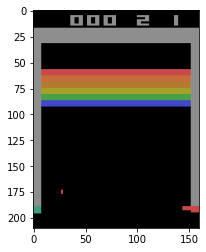

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



env = gym.make('BreakoutDeterministic-v4')
#env = gym.make('SpaceInvaders-v0')

#env = gym.make('CartPole-v1')
#env = gym.make('MountainCar-v0')


env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once


n_time_steps=100
for _ in range(n_time_steps):
    # plot frame
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    # choose action
    action = env.action_space.sample()
    # take action
    frame, reward, is_done, _ = env.step(action)    

In [12]:
# print(frame.shape, reward, is_done, _)

In [13]:
# print(env.__dir__() )